In [1]:
# using IJulia
# notebook()

In [2]:
# helper files

begin
	include("../helpers/constants.jl")
end

1.3271244004193938e11

## Problem 1

#### Calculate the mass ratio and characteristic quantities for each of the Earth-Moon and Sun-Earth systems. Discuss whether you expect the CR3BP to be a reasonable approximation of the dynamical environment governing the motion of a spacecraft in each of these systems and why.

In [3]:
begin
    ## earth-moon
    # characteristic mass
    m_star_earthmoon = mass_earth + mass_moon
    mu_earthmoon = mass_moon / m_star_earthmoon
    M2_earthmoon_nondim = mu_earthmoon
    M1_earthmoon_nondim = 1 - mu_earthmoon
    println("mass ratio (earth-moon): ", mu_earthmoon)
    println("characteristic mass (earth-moon): ", m_star_earthmoon)

    # characteristic length
    r1_earth2bary = 4670 # km
    r2_moon2bary = sma_moon_wrtearth - r1_earth2bary
    l_star_earthmoon = r1_earth2bary + r2_moon2bary
    println("characteristic length (earth-moon): ", l_star_earthmoon)

    # characteristic time
    t_star_earthmoon = (l_star_earthmoon^3 / (gm_earth + gm_moon))^0.5
    println("characteristic time (earth-moon): ", t_star_earthmoon)

    ## sun-earth
    # characteristic mass
    m_star_sunearth = mass_sun + mass_earth
    mu_sunearth = mass_earth / m_star_sunearth
    M2_sunearth_nondim = mu_sunearth
    M1_sunearth_nondim = 1 - mu_sunearth
    println("mass ratio (sun-earth): ", mu_sunearth)
    println("characteristic mass (sun-earth): ", m_star_sunearth)

    # characteristic length
    l_star_sunearth = sma_earth_wrtsun
    println("characteristic length (sun-earth): ", l_star_sunearth)

    # characteristic time
    t_star_sunearth = (l_star_sunearth^3 / (gm_sun + gm_earth))^0.5
    println("characteristic time (sun-earth): ", t_star_sunearth)


end

mass ratio (earth-moon): 0.012150865248790041
characteristic mass (earth-moon): 6.04566e24
characteristic length (earth-moon): 384400
characteristic time (earth-moon): 375190.26195184357
mass ratio (sun-earth): 3.0033603536994196e-6
characteristic mass (sun-earth): 1.9885059722e30
characteristic length (sun-earth): 149598023
characteristic time (sun-earth): 4531.839808982943


## Problem 2

#### a. Write a script to numerically integrate the equations of motion for the CR3BP using a nondimensional state vector defined in the rotating frame. In your writeup, discuss and justify your specific choice of integration scheme, the definition of any tolerances used during numerical integration, and the value you selected for these tolerances. Copy the text of your script to the end of this subproblem.

In [4]:
begin
    using DifferentialEquations
    using LinearAlgebra
    using Plots
end

In [5]:
function crtbp(dx,x,mu,t)
    # mu = mu_earthmoon

    r1 = ((x[1]+mu)^2 + x[2]^2 + x[3]^2)^0.5
    r2 = ((x[1]-1+mu)^2 + x[2]^2 + x[3]^2)^0.5

    dx[1] = x[4]
    dx[2] = x[5]
    dx[3] = x[6]
    dx[4] = 2*x[5] + x[1] - (1-mu)*(x[1]+mu)/r1^3 - (mu*(x[1]-1+mu))/r2^3
    dx[5] = -2*x[4] + x[2] - (1-mu)*x[2]/r1^3 - mu*x[2]/r2^3
    dx[6] = -(1-mu)*x[3]/r1^3 - mu*x[3]/r2^3

end

crtbp (generic function with 1 method)

## Problem 2

#### b. Numerically integrate the following initial conditions forward in time for the stated integration times in the Earth-Moon CR3BP:
- i. Initial Condition #1: 𝑥̅= [0.98, 0, 0, 0, 1.2,0] nondimensional units, Integration Time: 2 nondimensional units 
- ii. Initial Condition #2: 𝑥̅= [0.98, 0, 0, 0, 1.7,0] nondimensional units, Integration Time: 8 nondimensional units 
- iii. Initial Condition #3: 𝑥̅= [0.12, 0, 0, 0, 3.45,0] nondimensional units, Integration Time: 25 nondimensional units 
- iv. Initial Condition #4: 𝑥̅= [0.12, 0, 0, 0, 3.48,0] nondimensional units, Integration Time: 25 nondimensional units   

#### Plot the associated nondimensional trajectories in the configuration space. Add any information that you think would be useful to the plot of each trajectory. Discuss the characteristics of each trajectory. Then, justify, using any relevant additional information, quantities, or data, whether each trajectory is likely to closely approximate a true solution in the CR3BP.

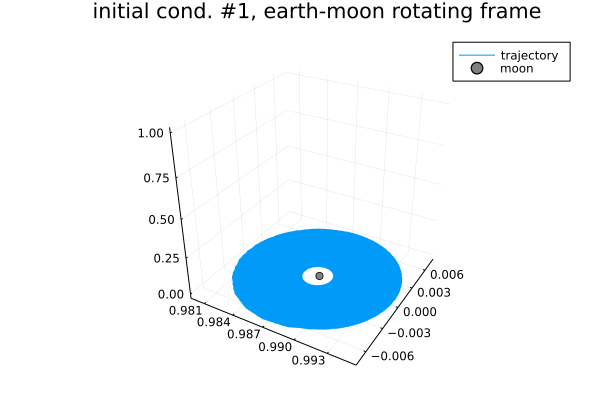

In [6]:
begin
    # initial condition 1
    x_bar = [0.98, 0, 0, 0, 1.2,0]
    tspan = (0.0,20.0)
    dt = 2
    prob = ODEProblem(crtbp, x_bar, tspan, mu_earthmoon)
    sol = solve(prob, RK4(), dt=dt)
    # println(sol.t)
#     println(sol[1,:])

#     println(r2_moon2bary)
#     println(l_star_earthmoon)
#     println(1-mu_earthmoon)

    # plot(sol.t, sol')
    plot(sol[1,:], sol[2,:], sol[3,:], label="trajectory", title="initial cond. #1, earth-moon rotating frame")
#     plot(sol,idxs=(1,2, 3))

    scatter!([1-mu_earthmoon],[0], [0], color="gray", markerwidth=100, label="moon")
#     scatter!([0],[0],[0],color="blue", markerwidth=100, label="earth")

end

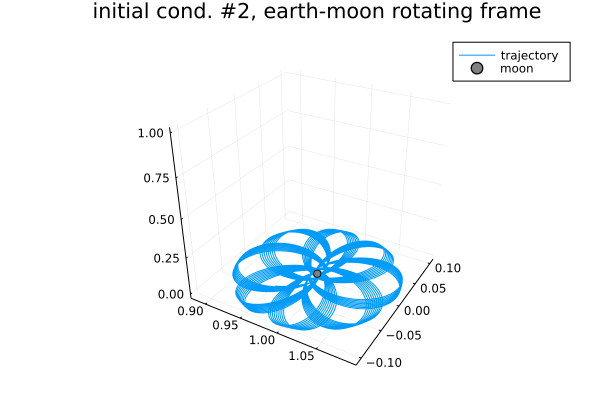

In [7]:
begin
    # initial condition 2
    x_bar2 = [0.98; 0; 0; 0; 1.7; 0]
    tspan2 = (0.0,50.0)
    dt2 = 8
    prob2 = ODEProblem(crtbp, x_bar2, tspan2, mu_earthmoon)
    sol2 = solve(prob2, Tsit5(), dt=dt2, reltol=1e-8, abstol=1e-8)
    
    plot(sol2[1,:], sol2[2,:], sol2[3,:], label="trajectory", title="initial cond. #2, earth-moon rotating frame")
    scatter!([1-mu_earthmoon],[0],[0],color="gray", markerwidth=100, label="moon")
    
end

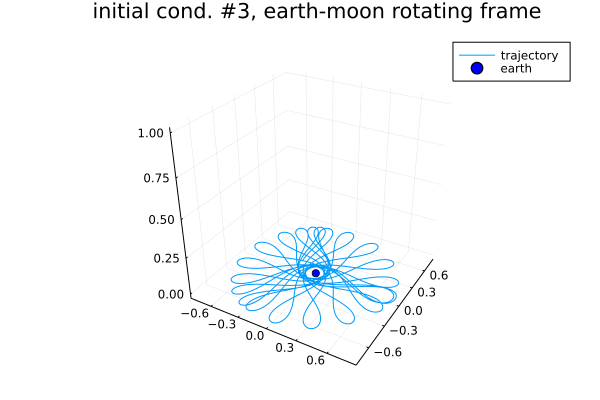

In [8]:
begin
    # initial condition 3
    x_bar3 = [0.12; 0; 0; 0; 3.45; 0]
    tspan3 = (0.0,40.0)
    dt3 = 25
    prob3 = ODEProblem(crtbp, x_bar3, tspan3, mu_earthmoon)
    sol3 = solve(prob3, Tsit5(), dt=dt3, reltol=1e-8, abstol=1e-8)
    
    plot(sol3[1,:], sol3[2,:], sol3[3,:], label="trajectory", title="initial cond. #3, earth-moon rotating frame")
    scatter!([0],[0],[0],color="blue", markerwidth=20, label="earth")
    
end

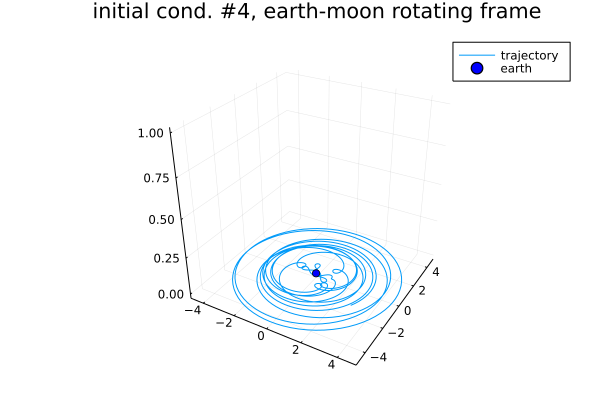

In [9]:
begin
    # initial condition 4
    x_bar4 = [0.12; 0; 0; 0; 3.48; 0]
    tspan4 = (0.0,100.0)
    dt4 = 25
    prob4 = ODEProblem(crtbp, x_bar4, tspan4, mu_earthmoon)
    sol4 = solve(prob4, Tsit5(), dt=dt4, reltol=1e-8, abstol=1e-8)
    
    plot(sol4[1,:], sol4[2,:], sol4[3,:], label="trajectory", title="initial cond. #4, earth-moon rotating frame")

    scatter!([0],[0],[0],color="blue", markerwidth=20, label="earth")

end

## Problem 2

#### c. Convert initial condition #3 and the associated integration time into dimensional quantities and report them in useful units. In addition, how far is the spacecraft located from the Earth at the initial time? How many orbital periods of the primary system is the integration time equivalent to?

In [10]:
function T_r_2_nrtl(vec, t)
    T_r2nrtl = [cos(t)  -sin(t)  0; sin(t)  cos(t) 0; 0 0 1]
    T_dot_r2nrtl = [-sin(t) -cos(t) 0; cos(t) -sin(t) 0; 0 0 0]
    
    r_nrtl = T_r2nrtl * vec[1:3]
    v_nrtl = T_r2nrtl * vec[4:6] + T_dot_r2nrtl * vec[1:3]

    return reduce(vcat, (r_nrtl, v_nrtl))
end



T_r_2_nrtl (generic function with 1 method)

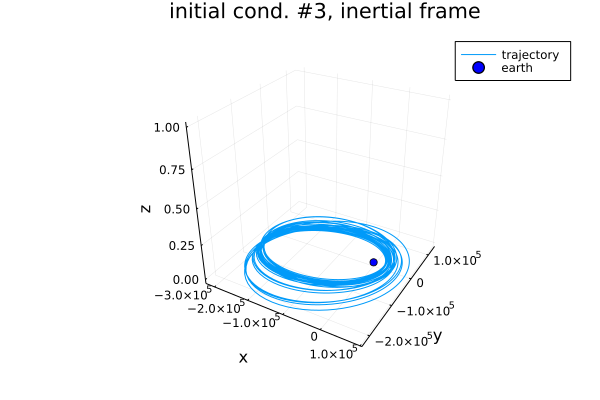

In [11]:
begin
    using DataFrames
    
    # initial condition 3
    x_bar3_dim = [0.12; 0; 0; 0; 3.45; 0]
    x_bar3_dim[1] = x_bar3_dim[1]
    x_bar3_dim[2] = x_bar3_dim[2]
    x_bar3_dim[3] = x_bar3_dim[3]
    x_bar3_dim[4] = x_bar3_dim[4]
    x_bar3_dim[5] = x_bar3_dim[5]
    x_bar3_dim[6] = x_bar3_dim[6]
    
    tspan3 = (0.0,50.0)
    dt3 = 25
    prob3 = ODEProblem(crtbp, x_bar3_dim, tspan3, mu_earthmoon)
    sol3 = solve(prob3, Tsit5(), dt=dt3, reltol=1e-8, abstol=1e-8)
        
    sol3_y = sol3[:]
    sol3_t = sol3.t

    sol3_nrtl = [T_r_2_nrtl(vec, t) for (vec, t) in zip(sol3_y, sol3_t)]
    sol3_nrtl = hcat(sol3_nrtl...)'
    
    sol3_nrtl[:, 1:3] = sol3_nrtl[:, 1:3] * l_star_earthmoon
    sol3_nrtl[:, 4:6] = sol3_nrtl[:, 4:6] * l_star_earthmoon / t_star_earthmoon

    plot(sol3_nrtl[:,1], sol3_nrtl[:,2], sol3_nrtl[:,3], label="trajectory", 
        title="initial cond. #3, inertial frame", xlabel="x", ylabel="y", zlabel="z")

    scatter!([0],[0],[0],color="blue", markerwidth=20, label="earth")
    

end

## Problem 3

#### a) Write a second script to numerically integrate the equations of motion for the CR3BP until a stopping condition is satisfied (another way to state this is “until a specific event occurs”). In this problem, let’s define the stopping condition as the first occurrence of y=0 along the trajectory, with 𝑦̇ > 0. Submit the text of your script for this subproblem submission.

#### b) Numerically integrate initial condition #3 listed in Problem 2b) until the stopping condition defined in Problem 3a). List the state vector at the stopping condition and the associated integration time.

[0.41726877795102324, -0.00022264631093595207, 0.0, 1.117736164871408, 0.6913755543416215, 0.0]


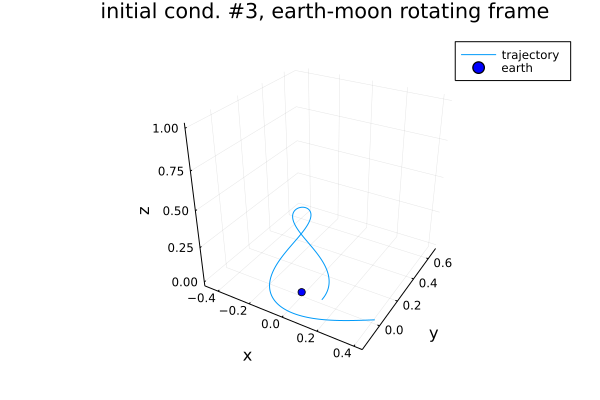

In [12]:
begin
    
    condition1(x,t,integrator) = x[2]
    affect1!(integrator) = terminate!(integrator)
    cb1 = ContinuousCallback(condition1,affect1!, save_positions=(true,true),)
        
    
    condition2(x,t,integrator) = x[5] > 0 && x[2] < 1e-6 && x[2] > -0.001
    affect2!(integrator) = terminate!(integrator)
    cb2 = DiscreteCallback(condition2, affect2!, save_positions=(true,true),)

    cbs = CallbackSet(cb1,cb2)
    
    
    # initial condition 3
    x_bar3_dim = [0.12; 0; 0; 0; 3.45; 0]
    x_bar3_dim[1] = x_bar3_dim[1]
    x_bar3_dim[2] = x_bar3_dim[2]
    x_bar3_dim[3] = x_bar3_dim[3]
    x_bar3_dim[4] = x_bar3_dim[4]
    x_bar3_dim[5] = x_bar3_dim[5]
    x_bar3_dim[6] = x_bar3_dim[6]
    
    tspan3 = (0.0,100.0)
    dt3 = 25
    prob3 = ODEProblem(crtbp, x_bar3_dim, tspan3, mu_earthmoon)
    sol3 = solve(prob3, Tsit5(), dt=dt3, callback=cb2, reltol=1e-12, abstol=1e-12)
    
    println(last(sol3))


    plot(sol3[1,:], sol3[2,:], sol3[3,:], label="trajectory", title="initial cond. #3, earth-moon rotating frame",
    xlabel="x", ylabel="y", zlabel="z")
    scatter!([0],[0],[0],color="blue", markerwidth=20, label="earth")
    
end

## Problem 4

#### a) Write a script to compute the zero velocity curves at a single value of the Jacobi constant. Note: there may be multiple methods for computing this information! In your writeup, discuss the procedure you used to calculate this information and justify the selection of any parameters or checks that govern this procedure, where relevant. Copy the text of your script to your submission for this subproblem.

In [13]:
function pseudopotential(M1_earthmoon_nondim, M2_earthmoon_nondim, mu_earthmoon, x, y)
    m1 = M1_earthmoon_nondim
    m2 = M2_earthmoon_nondim
    
    r1 = ((x+mu_earthmoon)^2 + y^2)
    r2 = ((x-1+mu_earthmoon)^2 + y^2)
    
    U = 1/2*(x^2 + y^2) + m1/r1 + m2/r2
    
    return U
end

pseudopotential (generic function with 1 method)

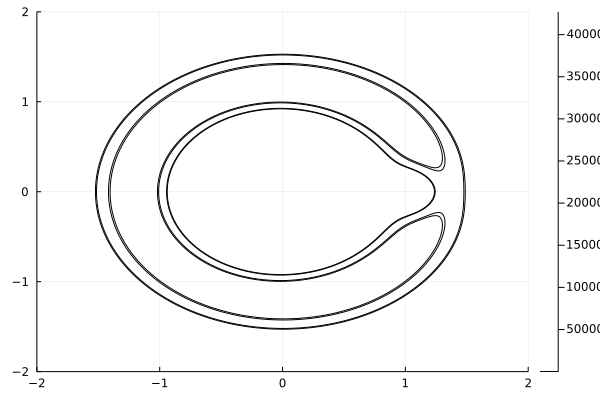

In [20]:


x = -2:0.01:2
y = -2:0.01:2
# # X, Y = meshgrid(x, y)

z = zeros(length(x),length(y))

for (i, xi) in enumerate(x)
    for (j, yj) in enumerate(y)

      z[j, i] = 2 * pseudopotential(M1_earthmoon_nondim, M2_earthmoon_nondim, mu_earthmoon, xi, yj)
    
    end
end



contour(x, y, z, levels=[3.189, 3.173, 3.013, 2.995])